In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs

In [4]:
import sys
# path to load the specific routines
sys.path.append(r'/ """ add your own path here""" /plotting_tools')
sys.path.append(r'/ """ add your own path here""" /Iron_Quant')
from plot import*
from extract_signal import*
from Iron_Quant import* 

# Load and Align

In [5]:
filename = "Sample_Stack_2018-03-30_198.hdf5"

In [6]:
s =load_STXM(filename, shift=0.4, number_of_region=1)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'Sample_Stack_2018-03-30_198.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
s[0].plot()

In [5]:
im = s[0].deepcopy()

## Decomposition for alignements

In [8]:
im.transpose().plot()

In [6]:
im.decomposition(True)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


In [11]:
im.plot_explained_variance_ratio()

<Axes: title={'center': '\nPCA Scree Plot'}, xlabel='Principal component index', ylabel='Proportion of variance'>

In [10]:
im.plot_decomposition_results()

In [7]:
sdec = im.get_decomposition_model(5)

In [8]:
sdec.plot()

## alignments

In [6]:
shifts = im.estimate_shift2D(reference = "cascade", hanning = True, sobel = True, medfilter = False,
           #roi=(120, 164, 1, 36),
           chunk_size = 30, normalize_corr = True, correlation_threshold = None, sub_pixel_factor=30)

  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
im.align2D(shifts = shifts)

WARNING | Hyperspy | The function you applied does not take into account the difference of units and of scales in-between axes. (hyperspy.signal:4998)
[########################################] | 100% Completed | 107.20 ms


In [10]:
im.plot()

In [29]:
# after iterating the alignments, apply all shifts to un-decomposed dataset
im.align2D(shifts = shifts+shifts2+shifts3)

[########################################] | 100% Completed | 106.56 ms


In [30]:
im.plot()

In [ ]:
im.save('align.hspy')

In [28]:
im=hs.load('align.hspy')

ValueError: No filename matches the pattern "align.hspy"

# Defining Io and normalize signal to it

## Defining Io

### From dedicated stack region

In [9]:
s[1].plot()

In [26]:
io = s[1].transpose().mean()

### From an image based on sum of the intensities at all energies

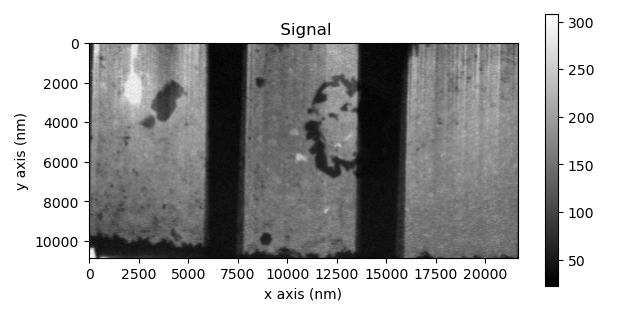

In [11]:
s_int = im.transpose().integrate1D(-1)
s_int.T.plot()

#### Entering threshold

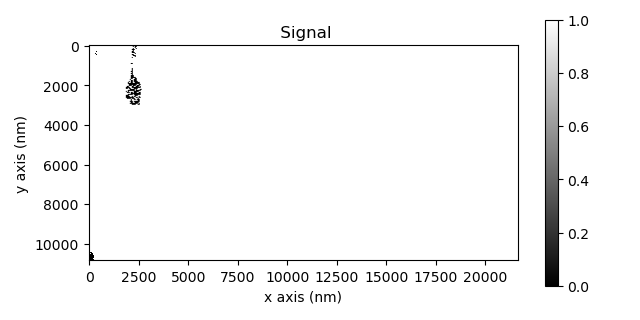

In [12]:
M_io = s_int<280
M_io.T.plot()

#### Creating and plotting the Io spectrum (from mask)

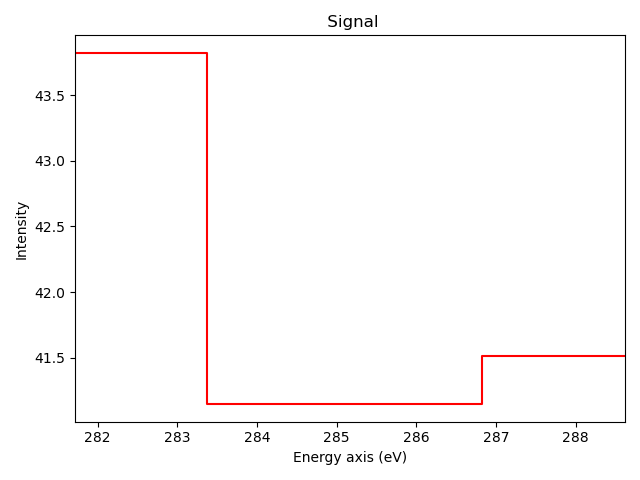

In [14]:
io = extract_spectra(im.transpose(), M_io, mode='mean')

In [12]:
io.save('io')

In [42]:
io = hs.load('io.hspy')

## Switching to Optical density

In [15]:
s_od = -np.log(im.transpose()/io)
s_od.plot()

In [46]:
s_od.save('s_od')

# Rapid view (spectra, map)

## Plotting a combined map

#### Masking the empty and the thick regions

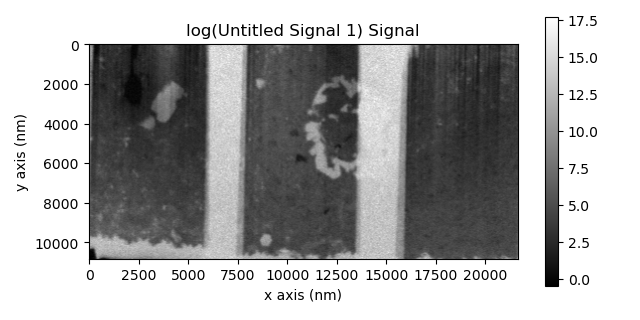

In [25]:
s_od.integrate1D(-1).T.plot()

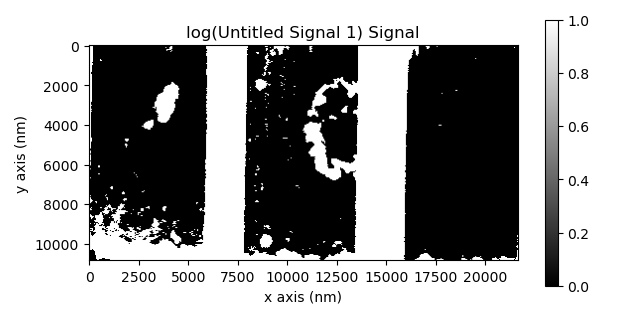

In [28]:
M_thick = s_od.integrate1D(-1)>6
M_thick.T.plot()

In [32]:
C1 = s_od.isig[2]-s_od.isig[0]
C2 = s_od.isig[1]-s_od.isig[0]

"C1.metadata.General.title = '285-280'\nC2.metadata.General.title = '287.5-280'\nC2 = C2-C1\nC3.metadata.General.title = '288.6-280'\nC3 = C3-C1"

In [ ]:
M = M_io+M_thick

In [33]:
C1N = copy.deepcopy(C1)/np.nanmax(C1.data)
C1N.data[(M).data] = np.nan
C2N = copy.deepcopy(C2)/np.nanmax(C2.data)
C2N.data[(M).data] = np.nan

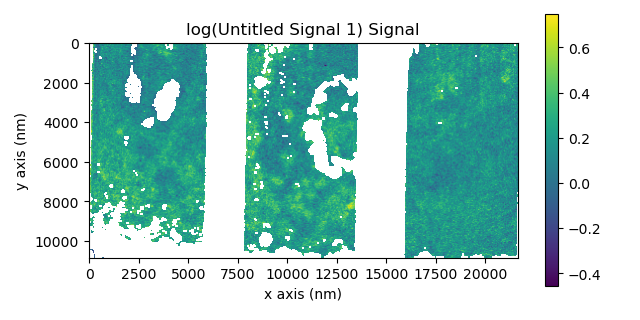

In [46]:
C1N.T.plot(cmap='viridis')

In [47]:
plt.gcf()
plt.savefig('MapStacks1.png', bbox_inches = 'tight')

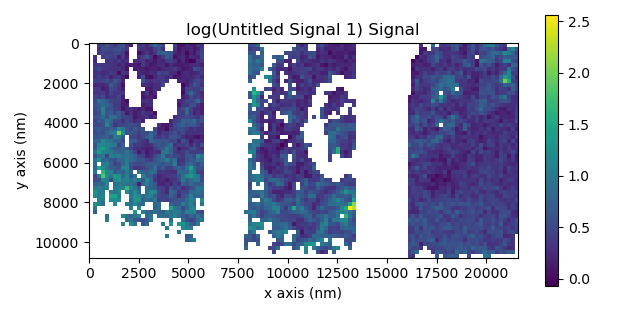

In [55]:
(C2N.rebin((433/4, 217/4))/4).T.plot(cmap='viridis')

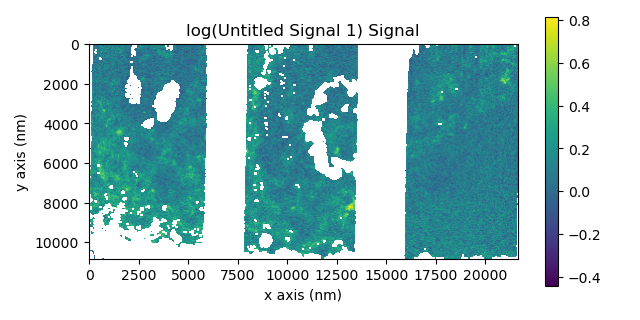

In [48]:
C2N.T.plot(cmap='viridis')

In [49]:
plt.gcf()
plt.savefig('MapStacks2.png', bbox_inches = 'tight')

### Creating the map

In [232]:
G=[C1N, C2N,C3N]
G = hs.hyperspy.utils.stack(G)

[########################################] | 100% Completed |  0.1s


#### Nombre de composant, leurs noms, et leurs couleurs

In [233]:
N=3
phases=['Name1', 'Name2', 'Name3']
colorscale = np.array([[228/255, 26/255, 28/255],
                       [55/255, 126/255, 184/255], 
                       [77/255, 175/255, 74/255],
                       #[255/255, 127/255, 0/255]
                      ]) #, [1,1,0],[1,0,1],[0.5,0.3,0.3],[0.3,0.5,0.3],[0.3,0.3,0.5], [0.5,0.5,0.5], [0.15, 0.15, 0.85]])

In [ ]:
plot_color_map(3, G, legend, colorscale)

# Modelling and substracting background

In [13]:
io = s[1].T.inav[:10000.].mean()

In [14]:
io.plot()

##### Building an image based on sum of the intensities at all energies

In [78]:
im.plot()

In [34]:
s_int = im.transpose().integrate1D(-1)
s_int.plot()

### Entering threshold

In [35]:
M_io = s_int<227000
M_io.plot()

#### Creating and plotting the Io spectrum (from mask)

C://Users/Corentin/Documents/Github/hyperspy-non_uniform_axes_2/hyperspy\signal.py:3645: UserWarning: You are summing over a non-uniform axis. The result can not be used as an approximation of the integral of the signal. For this functionality, use integrate1D instead.
  warnings.warn("You are summing over a non-uniform axis. The result "


<IPython.core.display.Javascript object>


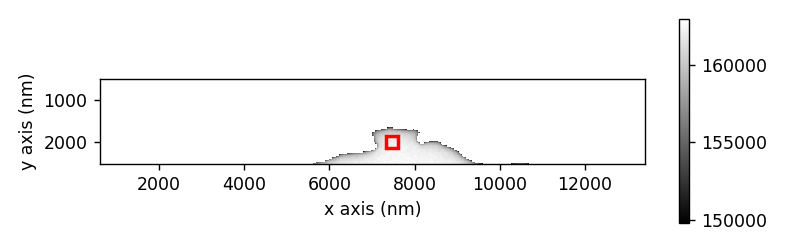

<IPython.core.display.Javascript object>


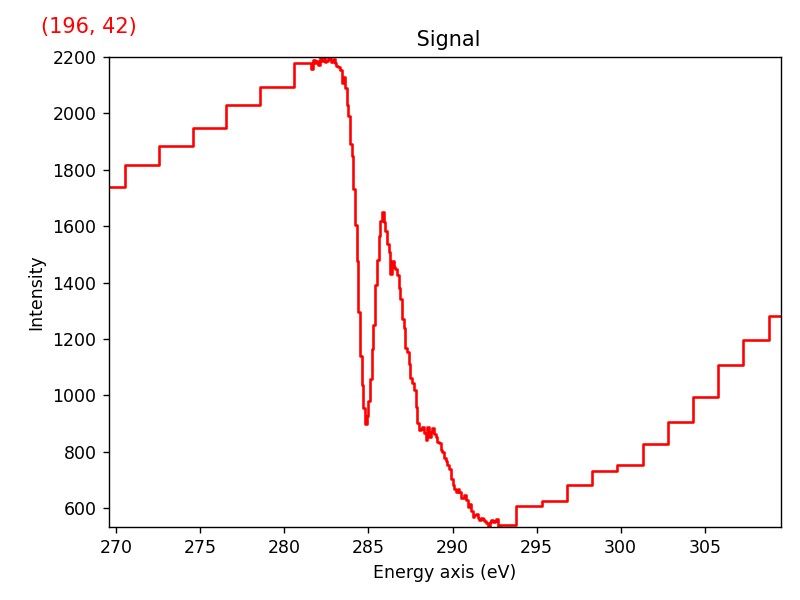

C://Users/Corentin/Documents/Github/hyperspy-non_uniform_axes_2/hyperspy\drawing\utils.py:165: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(window_title)


In [59]:
s_io.plot()

In [15]:
im2.plot()

/home/corentin/data/Github/hyperspy-RELEASE_next_minor/hyperspy/drawing/utils.py:181: MatplotlibDeprecationWarning: Toggling axes navigation from the keyboard is deprecated since 3.3 and will be removed two minor releases later.
  key_press_handler(event, canvas, canvas.manager.toolbar)
Traceback (most recent call last):
  File "/home/corentin/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 270, in process
    func(*args, **kwargs)
  File "/home/corentin/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 3063, in mouse_move
    s = self._mouse_event_to_message(event)
  File "/home/corentin/.local/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 3043, in _mouse_event_to_message
    s = event.inaxes.format_coord(event.xdata, event.ydata)
  File "/home/corentin/data/Github/hyperspy-RELEASE_next_minor/hyperspy/drawing/image.py", line 476, in format_coord
    z = data[row, col]
IndexError: index 22 is out of bounds for axis 0 with size

In [36]:
import copy
s_io = copy.deepcopy(im.transpose())
s_io.data[M_io.data, :] = np.nan
io = s_io._get_signal_signal(np.nanmean(s_io.data, axis=(0, 1)))
io.plot()

## Masking

In [ ]:
s_od = hs.load('s_od.hspy')
s_od

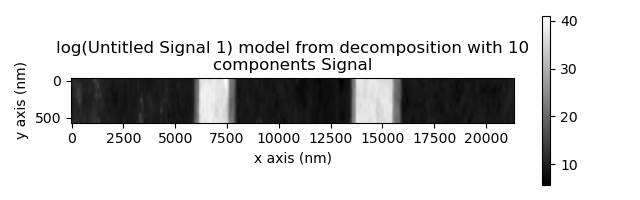

In [11]:
s_od.integrate1D(-1).T.plot()

In [12]:
M_thick = s_od_mod.integrate1D(-1)>14

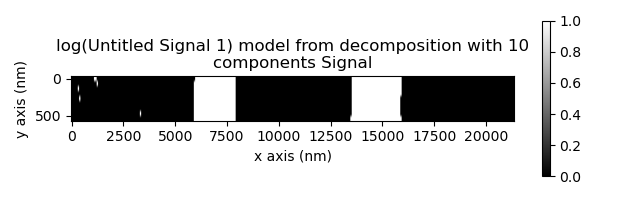

In [13]:
M_thick.T.plot()

## Quantify

In [45]:
%%time
s_back, m, s_arc, Q1, Q2 = Iron_Quant(s_od, method='Integration', mask=M_thick.data)

  0%|          | 0/2961 [00:00<?, ?it/s]

  0%|          | 0/2347 [00:00<?, ?it/s]

CPU times: user 6min 15s, sys: 583 ms, total: 6min 16s
Wall time: 6min 14s


In [46]:
m.plot(True)

In [47]:
s_back.save('s_back')
s_arc.save('s_arc')
m.save_parameters2file('fit')
Q1.save('Q1')
Q2.save('Q2')

Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_Feb2024/Data par sample/ryugu/Coupe1_G1_1/Fe/s_back.hspy' (y/n)?
 y
Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_Feb2024/Data par sample/ryugu/Coupe1_G1_1/Fe/s_arc.hspy' (y/n)?
 y
Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_Feb2024/Data par sample/ryugu/Coupe1_G1_1/Fe/Q1.hspy' (y/n)?
 y
Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_Feb2024/Data par sample/ryugu/Coupe1_G1_1/Fe/Q2.hspy' (y/n)?
 y


# Reload and analyze

In [30]:
Q1=hs.load('Q1.hspy')

In [3]:
Q1=hs.load('Q1.hspy')
s_back=hs.load('s_back.hspy')
s_arc=hs.load('s_arc.hspy')

In [52]:
Q1.data=np.where(Q1>100., np.nan, Q1.data)
Q1.data=np.where(Q1<0., np.nan, Q1.data)
Q1.data=np.where(M_thick==1, np.nan, Q1.data)

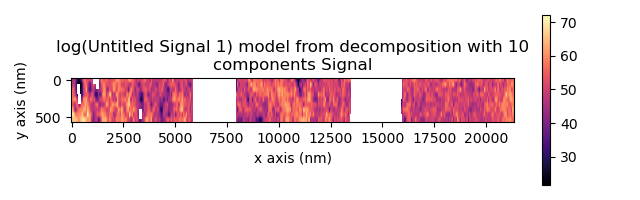

In [54]:
Q1.T.plot(cmap='magma')

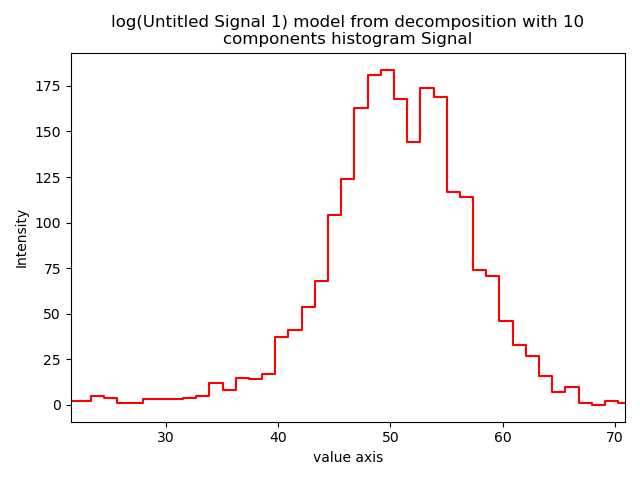

In [55]:
Qbis.T.get_histogram().plot()

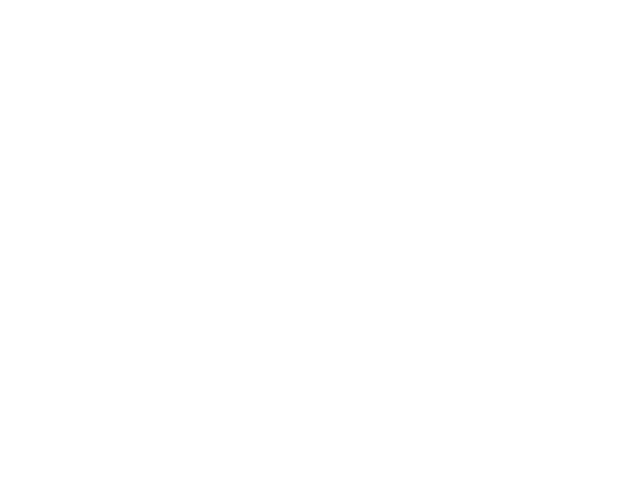

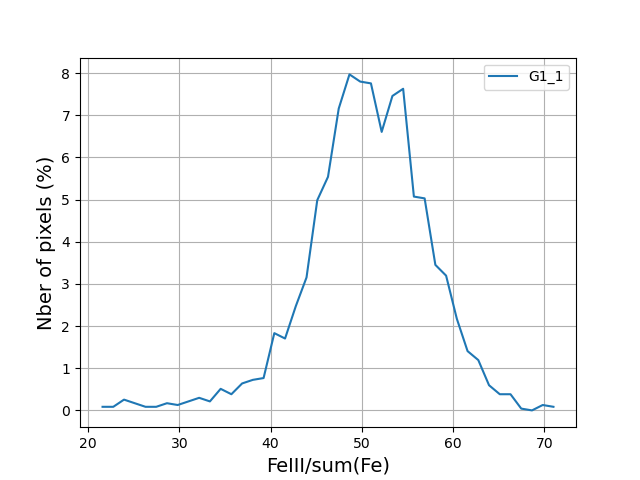

In [58]:
Histo = Q1.get_histogram()

plt.figure()
fig, ax = plt.subplots()
ax.plot(Histo.axes_manager[0].axis, Histo*100/np.sum(Histo.data), label='G1_1')
leg = ax.legend();
#plt.xlim([0, 2.5]) 
plt.grid()
plt.xlabel('FeIII/sum(Fe)', size=14)
plt.ylabel('Nber of pixels (%)', size=14)

plt.savefig('Histos.png', bbox_inches="tight")

In [51]:
Q1.transpose().plot(cmap='viridis')
plt.gcf()
plt.savefig('Quantified_map', bbox='tight')

<ipython-input-51-870a86bb157a>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Quantified_map', bbox='tight')


In [57]:
m['double_arctan'].height_1.as_signal().plot()

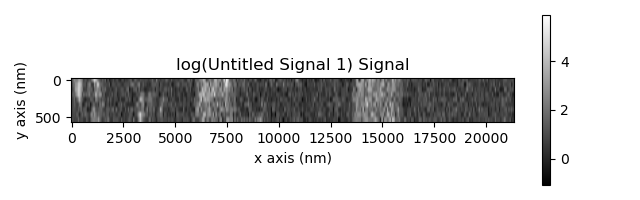

In [48]:
s_back.isig[700.:715.].integrate1D(-1).T.plot()

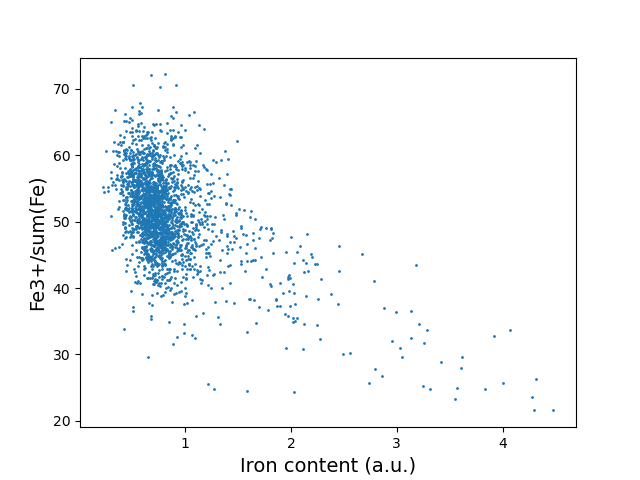

In [59]:
plt.figure()
plt.plot(s_back.isig[700.:715.].integrate1D(-1).data.flatten(), Q1.data.flatten(), '.' , markersize = 2 ) #label = 'Aromatic + Olefinic'

plt.xlabel('Iron content (a.u.)', size=14)
plt.ylabel('Fe3+/sum(Fe)', size=14)
#plt.ylim(0., 60.)
#plt.legend()

plt.gcf()
plt.savefig('Iron_vs_val.png', dpi=500, bbox_inches='tight')

In [31]:
s_back.isig[700.:715].integrate1D(-1).plot()

In [85]:
Q1.plot()

# thresholding spectra

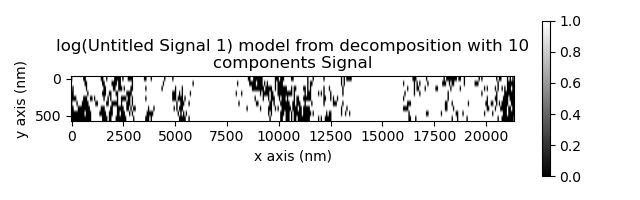

In [60]:
M1a = Q1<55
M1b = s_back.isig[700.:715.].integrate1D(-1)<0.1
M1=M1a+M1b+M_thick
M1.T.plot()

In [61]:
def extract_spectra(s, mask, plot=True, mode = 'mean'):
    """This function allows to extract a spectra from a masked signal
    ** s : the signal
    ** M : the mask to apply
    ** mode : the spectra can be either 'mean' or 'sum' of all unmasked pixels"""

    import copy
    import numpy as np
    s_M = copy.deepcopy(s)
    s_M.data[mask.data, :] = np.nan
    if mode == 'mean':
        sp = s_M._get_signal_signal(np.nanmean(s_M.data, axis=(0, 1)))
    
    elif mode== 'sum':
        sp = s_M._get_signal_signal(np.nansum(s_M.data, axis=(0, 1)))
    
    #sp.metadata=s.metadata
    if plot ==True: sp.plot(True)
    return sp


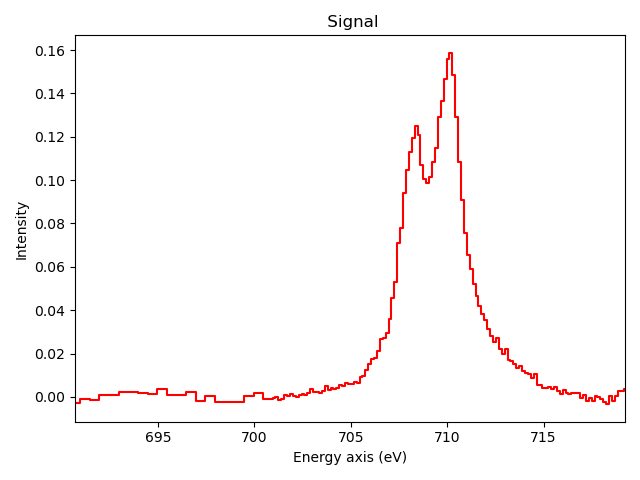

In [73]:
sp1 = extract_spectra(s_arc, M1)

In [54]:
sp1.save('sp_mean_above60')

Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_Feb2024/Data par sample/ryugu/Coupe1_G1_1/Fe/sp_mean_above60.hspy' (y/n)?
 y


In [165]:
Q1.get_histogram().plot()

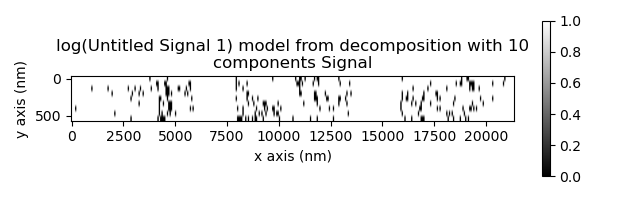

In [63]:
M2a = s_back.isig[700.:715.].integrate1D(-1)<0.5
M2b = s_back.isig[700.:715.].integrate1D(-1)>1.5
M2c = Q1>45
M2=M2a+M2b+M2c+M_thick
M2.T.plot()

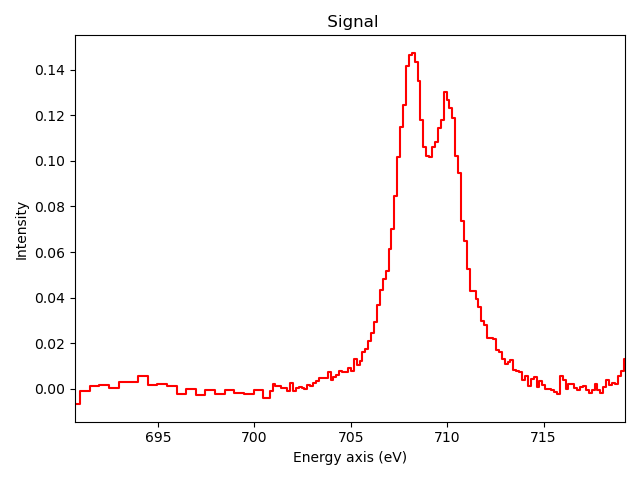

In [74]:
sp2 = extract_spectra(s_arc, M2)

In [69]:
sp2.save('Fe75_higherFe_areas')

In [67]:
M3a=s_back.isig[700.:715].integrate1D(-1)<1
M3b = s_back.isig[700.:715].integrate1D(-1)>1.5
M3c=Q1>70
M3=M3a+M3b+M3c
M3.plot()

In [68]:
s_3 = copy.deepcopy(s_arc)
s_3.data[(M+M3).data, :] = np.nan
sp3 = s_3._get_signal_signal(np.nanmean(s_3.data, axis=(0, 1)))
sp3.plot()

In [70]:
sp3.save('Fe65_lowerFe_areas')

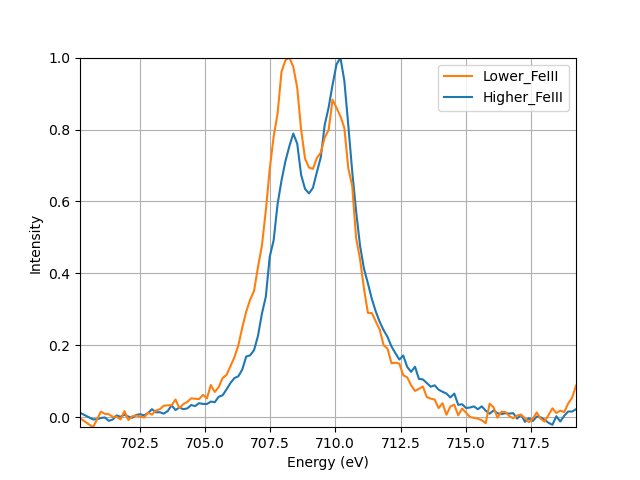

In [142]:
hs.plot.plot_spectra([sp1.isig[700.:]/np.max(sp1.data), sp2.isig[700.:]/np.max(sp2.data)],
                     legend = ['Higher_FeIII','Lower_FeIII']) #style='overplot',legend_loc='upper right'
plt.grid()
plt.gcf()
plt.savefig('All_spectra.png')

In [143]:
plt.gcf()
plt.savefig('Main_Spectra.png', bbox_inches='tight')
plt.savefig('Main_Spectra.pdf', bbox_inches='tight')

# Linear combination

In [75]:
lin_mod = s_arc.create_model()
N=2
lin_mod.set_signal_range((700., 715.))

In [76]:
S=[sp1, sp2] #, sp3]

In [77]:
# On défini les composants au model qui correspondent aux spectres de ref
g = []
for i in range (N):
    g.append(hs.model.components1D.ScalableFixedPattern(S[i]))
    lin_mod.extend([g[i]])
    lin_mod.set_parameters_not_free([g[i]], parameter_name_list=['xscale','shift'])#On fixe les parametres xscale et shift, pour qu'il n'y ait que la hauteur qui soit ajustable.
    g[i].yscale.bmin=0    #On fixe les bornes min et max des alpha.
    g[i].yscale.bmax=1

In [107]:
lin_mod.plot(True)

/home/corentin/data/Github/hyperspy-RELEASE_next_minor/hyperspy/signal.py:3706: UserWarning: You are summing over an unbinned, non-uniform axis. The result can not be used as an approximation of the integral of the signal. For this functionality, use integrate1D instead.
  warnings.warn("You are summing over an unbinned, non-uniform axis. "


In [78]:
lin_mod.multifit(bounded=True, mask = M_thick.data)

  0%|          | 0/2347 [00:00<?, ?it/s]

In [182]:
lin_mod.assign_current_values_to_all()

In [79]:
lin_mod.plot(True)

In [83]:
G = []
for i in range(N): G.append(g[i].yscale.as_signal())
G=hs.hyperspy.utils.stack(G)
G.data=np.where(M_thick==1, np.nan, G.data)

[########################################] | 100% Completed | 102.41 ms
[########################################] | 100% Completed | 102.74 ms


In [84]:
G.data=np.where(Q1>100., np.nan, G.data)
G.data=np.where(Q1<0., np.nan, G.data)

In [85]:
G.plot()

In [203]:
G.save('mixing_model')

Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/Soleil_July2021_round1round2/meteorites/Orgueil_FIB/Orgueil_G2-2/Fe/mixing_model.hspy' (y/n)?
 y


In [9]:
tot = G.inav[0]+G.inav[1]+G.inav[2]
res1 = copy.deepcopy(tot)
res1.data = np.array(1-tot.data)
res1.plot()

NameError: name 'G' is not defined

In [95]:
phases=['Higher FeIII', 'Lower Fe-III'] # Fe75_higherFe_areas']

colorscale = np.array([[55/255, 126/255, 184/255], 
                       [255/255, 127/255, 0/255],
                        [77/255, 175/255, 74/255],
                        [228/255, 26/255, 28/255],
                      ]) #, [1,1,0],[1,0,1],[0.5,0.3,0.3],[0.3,0.5,0.3],[0.3,0.3,0.5], [0.5,0.5,0.5], [0.15, 0.15, 0.85]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


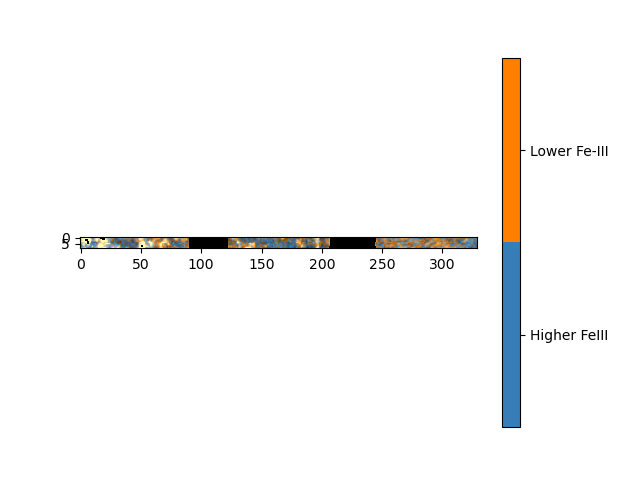

In [96]:
plot_color_map(2, G, phases, colorscale)

In [97]:
plt.gcf()
plt.savefig('Map_mixing_model.png', bbox_inches="tight")
plt.savefig('Map_mixing_model.pdf', bbox_inches="tight")

# Redefine spectra based on mixing model

In [ ]:
G=hs.load('Map_mixing_model.hspy')

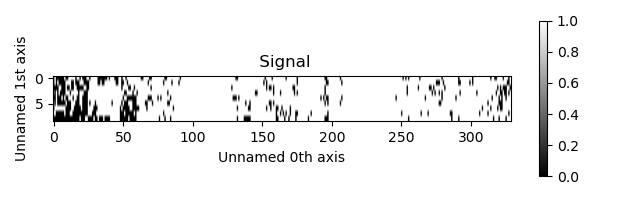

In [136]:
H = hs.signals.BaseSignal(G.data[0,:,:])
M_part1 =(H<0.95)+(M_thick+M_bof.T).T
M_part1.plot()

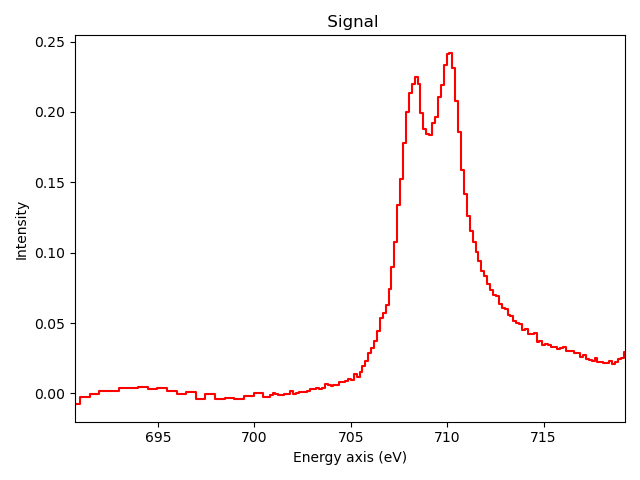

In [137]:
sp_part1 = extract_spectra(s_back, ~M_part1)

In [138]:
sp_part1.save('sp_part1')

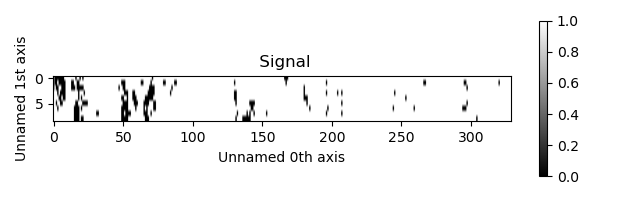

In [139]:
H = hs.signals.BaseSignal(G.data[1,:,:])
M_part2 =(H<0.95)+(M_thick+M_bof.T).T
M_part2.plot()

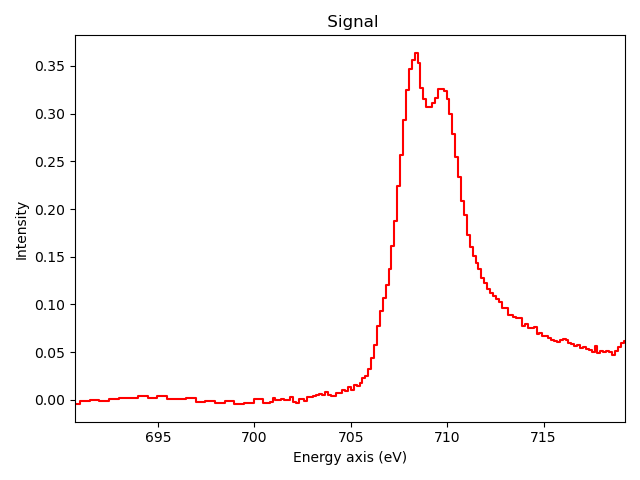

In [140]:
sp_part2 = extract_spectra(s_back, M_part2)

In [128]:
sp_part2.save('sp_part2')

In [146]:
legend=['Large_grain', 'Particle', 'Average diffuse OM']

Text(0, 0.5, 'Opt. Density (a.u.)')

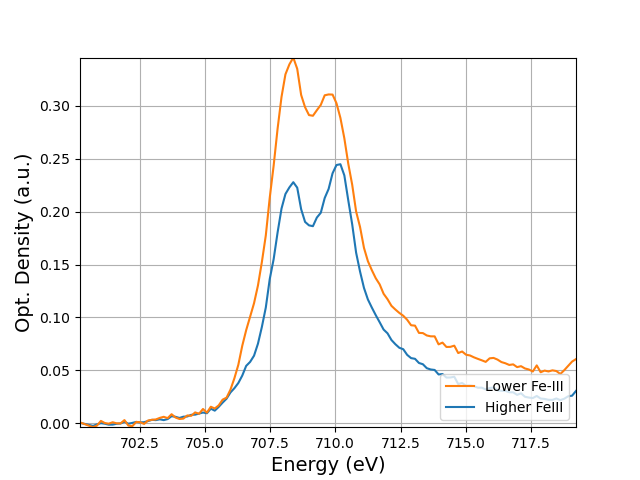

In [135]:
hs.plot.plot_spectra([sp_part1.isig[700.:], 
                      sp_part2.isig[700.:], 
                    #sp_carbonate.isig[282.:294.], 
                       #sp_thick.isig[282.:294.], 
],
                     legend=phases,
                    legend_loc='lower right',)
plt.grid()
plt.xlabel('Energy (eV)',size=14)
plt.ylabel('Opt. Density (a.u.)',size=14)

Text(0, 0.5, 'Opt. Density (a.u.)')

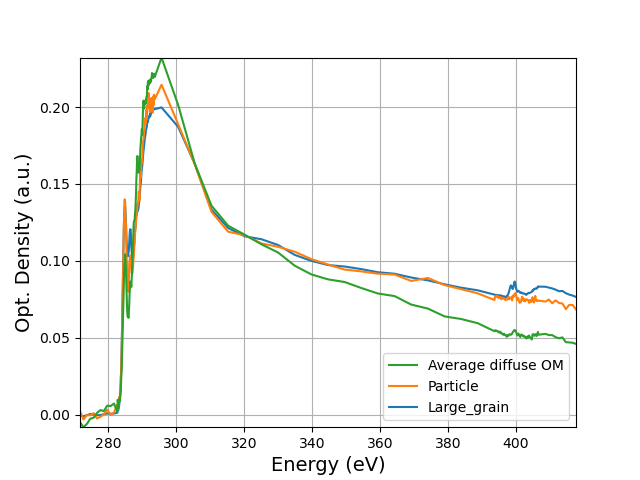

In [150]:
hs.plot.plot_spectra([sp_part1, 
                      sp2, 
                      sp_diff,
                    #sp_carbonate.isig[282.:294.], 
                       #sp_thick.isig[282.:294.], 
],
                     legend=legend,
                    legend_loc='lower right',)
plt.grid()
plt.xlabel('Energy (eV)',size=14)
plt.ylabel('Opt. Density (a.u.)',size=14)

In [152]:
mlg = sp_part1.create_model()

In [153]:
mlg.re

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------

In [151]:
plt.gcf()
plt.savefig('Main_spectra_large', bbox_inches='tight')

In [19]:
M_part1.save('M_part1')
M_part2.save('M_part2')
M_diff.save('M_diff')
#M_carbonate.save('M_carbonate')
#M_thick.save('M_thick')

Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/SOLEIL_June2023/By_samples/Ryugu_Grain4_G3-2/M_part1.hspy' (y/n)?
 y
Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/SOLEIL_June2023/By_samples/Ryugu_Grain4_G3-2/M_part2.hspy' (y/n)?
 y
Overwrite '/win/Users/Corentin Le Guillou/Desktop/Sciences_et_avenir/XANES/SOLEIL_June2023/By_samples/Ryugu_Grain4_G3-2/M_diff.hspy' (y/n)?
 y
